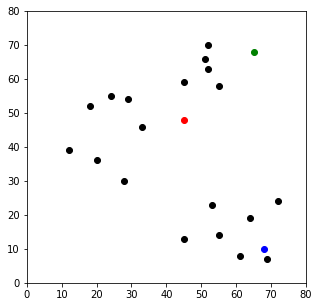

In [1]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 13, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(0)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(1, 80), np.random.randint(1, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b',4:'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
1   20  36        27.730849        55.217751        54.589376        1     r
2   28  30        24.758837        53.037722        44.721360        1     r
3   18  52        27.294688        49.648766        65.299311        1     r
4   29  54        17.088007        38.626416        58.796258        1     r
5   33  46        12.165525        38.832976        50.209561        1     r
6   24  55        22.135944        43.011626        62.936476        1     r
7   45  59        11.000000        21.931712        54.129474        1     r
12  55  58        14.142136        14.142136        49.729267        1     r
11  52  63        16.552945        13.928388        55.362442        2     g
9   52  70        23.086793        13.152946        62.096699        2     g
10  51  66        18.973666        14.142136        58.523500        2     g
17  69   7        47.507894        61.131007         3.162278        3     b

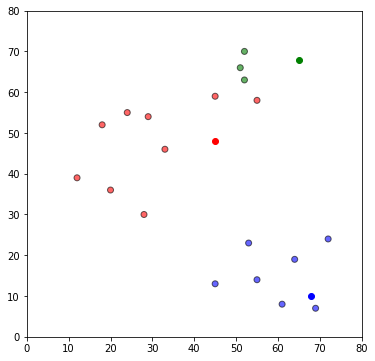

In [2]:
#assignment
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
df=df.sort_values(['closest'])
print(df[1:15])
fig = plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.6, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

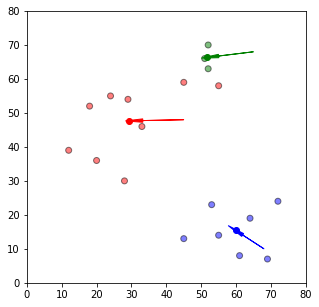

In [3]:
# updating old centroid to new one
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    #for marking the new centroid with arrow
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=1, head_length=5, fc=colmap[i], ec=colmap[i])
plt.show()

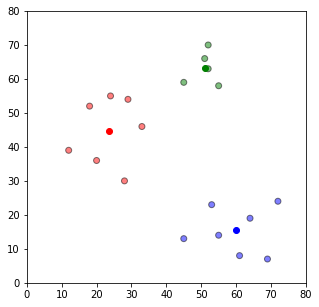

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
12    2
11    2
9     2
10    2
17    3
8     3
13    3
14    3
15    3
16    3
18    3
Name: closest, dtype: int64


In [6]:


# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
print(df['closest'])

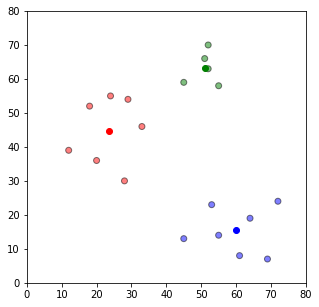

In [5]:
#repeating the process till we get clustering of points which are closest to the centroid or mean
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
